In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy.integrate import odeint
import random as rd

<ipython-input-13-4396f66d917e>:52: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.sqrt(y/abs(y))*(r**2*(np.sqrt((abs(abs(x)-r/8))/(abs(x)-r/8)))-(x**2)))
<ipython-input-13-4396f66d917e>:56: RuntimeWarning: invalid value encountered in sqrt
  return -np.sqrt(np.sqrt(y/abs(y))*(r**2*(np.sqrt((abs(abs(x)-r/8))/(abs(x)-r/8)))-(x**2)))


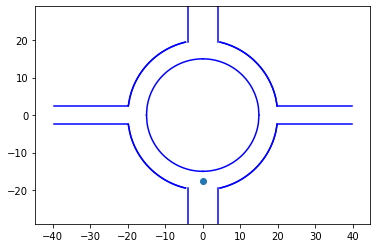

In [13]:
### Un seul tour

# Section 1 : Initialisation

# 1.1 - Définitions:

# a) Limites du rond-point

r1, r2 = 15, 20

# b) Coordonnées

n = rd.randint(0,2)                         # Sortie aléatoire (avec sortie i pour n == i-1)
rtraj = (r1+r2)/2                               # Rayon de la trajectoire
t = np.linspace(-np.pi/2, n*np.pi/2, (n+1)*100) # Paramètres pour la position de la voiture 
                                                # (n+1)*100 -> pour avoir vitesse constante du point
x = rtraj*np.cos(t)                             # Abscisses de la voiture dans le rond-point
y = rtraj*np.sin(t)                             # Ordonnées de la voiture dans le rond-point

if n==0:                                        # Coordonnées de la voiture en sortie 1
    xsortie1 = np.linspace(rtraj, 42, 100)
    ysortie1 = np.linspace(0,0,100)  
    x = np.concatenate((x,xsortie1), axis = 0)
    y = np.concatenate((y,ysortie1), axis = 0)
elif n==1:                                      # Coordonnées de la voiture en sortie 2
    xsortie2 = np.linspace(0, 0, 100)
    ysortie2 = np.linspace(rtraj,42,100)
    x = np.concatenate((x,xsortie2), axis = 0)
    y = np.concatenate((y,ysortie2), axis = 0)
else:                                           # Coordonnées de la voiture en sortie 3
    xsortie3 = np.linspace(-rtraj, -42, 100)
    ysortie3 = np.linspace(0,0,100)
    x = np.concatenate((x,xsortie3), axis = 0)
    y = np.concatenate((y,ysortie3), axis = 0)

r = np.sqrt(63*r2**2/64)                    # Constante choisie pour tronquer le cercle extérieur

# 1.2 - Création de la figure et du rond-point

# a) Création de la figure et paramétrages

fig, ax = plt.subplots()
ax.margins(0,0)
x_min, x_max, y_min, y_max = ax.axis('tight')
x_min, x_max, y_min, y_max = -39, 39, -29, 29
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

# b) Création du rond-point

def f1(x,r): # Création de la partie positive du cercle extérieur, tronqué
    y=x**2-63*r/64
    return np.sqrt(np.sqrt(y/abs(y))*(r**2*(np.sqrt((abs(abs(x)-r/8))/(abs(x)-r/8)))-(x**2)))

def f2(x,r): # Création de la partie négative du cercle extérieur, tronqué
    y=x**2-63*r/64
    return -np.sqrt(np.sqrt(y/abs(y))*(r**2*(np.sqrt((abs(abs(x)-r/8))/(abs(x)-r/8)))-(x**2)))

# c) Création des routes liées au rond-point
f3 = lambda x: -r/8
f4 = lambda x: r/8

# Abscisses
X1=np.linspace(0,r1,100) # Pour la partie positive du cercle intérieur
X2=np.linspace(0,-r1,100) # Pour la partie négative du cercle intérieur
X3 = np.linspace(-r,r,100) # Pour la partie positive du cercle extérieur, tronqué
X4 = np.linspace(-r,r,100) # Pour la partie négative du cercle extérieur, tronqué
X5 = np.linspace(-2*r,-r,100) # Pour la route ouest
X6 = np.linspace(r,2*r,100) # Pour la route est

# Ordonnées

Y1 = [np.sqrt(r1**2-x**2) for x in X1] # Pour la partie positive du cercle intérieur
Y2 = [-np.sqrt(r1**2-x**2) for x in X2] # Pour la partie négative du cercle intérieur
Y3 = [f1(x,r2) for x in X3] # Pour la partie positive du cercle extérieur, tronqué
Y4 = [f2(x,r2) for x in X4] # Pour la partie négative du cercle extérieur, tronqué
Y5 = [f3(x) for x in X5] # Pour la route ouest
Y6 = [f4(x) for x in X6] # Pour la route est

# Tracés des courbes dans un même graphe

plt.axis("equal")
ax.plot(X1,Y1,'b') # Cercle intérieur
ax.plot(X2,Y1,'b') # Cercle intérieur
ax.plot(X1,Y2,'b') # Cercle intérieur
ax.plot(X2,Y2,'b') # Cercle intérieur
ax.plot(X3,Y3,'b') # Cercle extérieur, tronqué
ax.plot(X4,Y3,'b') # Cercle extérieur, tronqué
ax.plot(X3,Y4,'b') # Cercle extérieur, tronqué
ax.plot(X4,Y4,'b') # Cercle extérieur, tronqué
ax.plot(X5,Y5,'b') # Route ouest
ax.plot(X6,Y5,'b') # Route est
ax.plot(X5,Y6,'b') # Route ouest
ax.plot(X6,Y6,'b') # Route est
ax.plot([-r/5, -r/5], [y_min, min(Y4)], 'b') # Route sud
ax.plot([-r/5, -r/5], [max(Y3), y_max], 'b') # Route nord
ax.plot([r/5, r/5], [y_min, min(Y4)], 'b') # Route sud
ax.plot([r/5, r/5], [max(Y3), y_max], 'b') # Route nord

# Création de la ligne qui sera mise à jour au fur et à mesure

line, = ax.plot([],[], color='blue')
point, = ax.plot([], [], ls="none", marker="o")

# Gestion des limites de la fenêtre

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

# Création de la fonction qui sera appelée à chaque nouvelle image de l'animation

def animate(k):
    i = min(k, x.size)
    #line.set_data(x[:i], y[:i]) pour avoir le chemin parcouru
    point.set_data(x[i], y[i])
    return line, point

# Génération de l'animation

ani = animation.FuncAnimation(fig=fig, func=animate, frames=range(x.size), interval=10, blit=True, repeat = False)

plt.axis("equal")
plt.show()